# Well this is a kick in the pants
We thought that the days of kickers being rostered in daily fantasy had long since passed, but apparently FanDuel still has roster spots for kickers. So with the first Sunday of the NFL season exactly five weeks away as we type this, we had just finished our defense model and we were going to get started on our quarterbacks model. Now we have to take this little detour for a kicking model. We'll try to do this in short order because time is running out to model the more important positions.<br>

The first thing we need to do is extract our target variable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nfl_data_py as nfl

# FanDuel scoring for kickers
Here is the overall FanDuel scoring for offensive players. Since a kicker can possibly run, throw and catch the ball, we need to account for all this.

In [2]:
#FANDUEL
#Rushing yards made = 0.1pts	
#Rushing touchdowns = 6pts	
#Passing yards = 0.04pts	
#Passing touchdowns = 4pts	
#Interceptions = -1pt	
#Receiving yards = 0.1pts	
#Receiving touchdowns = 6pts	
#Receptions = 0.5pts	
#Kickoff return touchdowns = 6pts	
#Punt return touchdowns = 6pts	
#Fumbles lost = -2pts	
#Own fumbles recovered touchdowns = 6pts	
#Two-point conversions scored = 2pts	
#Two-point conversion passes = 2pts	
#Field-goals from 0-39 yards = 3pts	
#Field-goals from 40-49 yards = 4pts	
#Field-goals from 50+ yards = 5pts	
#Extra-point conversions = 1pt

In [3]:
seasons = list(np.arange(2000, 2024, 1))

In [4]:
# nfl_weekly = nfl.import_weekly_data(seasons)

In [5]:
# nfl_weekly.info()

# Play-by-play data
It turns out we need the NFL play-by-play data. There are only 44 kicker rows in the NFL weekly data, which mostly covers passers, rushers and receivers. We'll have to extract our kicking data from the pbp data.

In [6]:
nfl_pbp = nfl.import_pbp_data(seasons)

2000 done.
2001 done.
2002 done.
2003 done.
2004 done.
2005 done.
2006 done.
2007 done.
2008 done.
2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
2020 done.
2021 done.
2022 done.
2023 done.
Downcasting floats.


In [7]:
pbp_cols = list(nfl_pbp.columns)

In [8]:
pbp_cols

['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'side_of_field',
 'yardline_100',
 'game_date',
 'quarter_seconds_remaining',
 'half_seconds_remaining',
 'game_seconds_remaining',
 'game_half',
 'quarter_end',
 'drive',
 'sp',
 'qtr',
 'down',
 'goal_to_go',
 'time',
 'yrdln',
 'ydstogo',
 'ydsnet',
 'desc',
 'play_type',
 'yards_gained',
 'shotgun',
 'no_huddle',
 'qb_dropback',
 'qb_kneel',
 'qb_spike',
 'qb_scramble',
 'pass_length',
 'pass_location',
 'air_yards',
 'yards_after_catch',
 'run_location',
 'run_gap',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
 'two_point_conv_result',
 'home_timeouts_remaining',
 'away_timeouts_remaining',
 'timeout',
 'timeout_team',
 'td_team',
 'td_player_name',
 'td_player_id',
 'posteam_timeouts_remaining',
 'defteam_timeouts_remaining',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'po

In [420]:
#dupes = nfl_pbp[nfl_pbp.duplicated()]

In [421]:
# dupes NO DUPES FOUND

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_players,defense_players,n_offense,n_defense,ngs_air_yards,time_to_throw,was_pressure,route,defense_man_zone_type,defense_coverage_type


# Columns needed for kicking
We sort of manually pared down the pbp columns to the ones we might need for kicker points. It might look like overkill, but we have to account for those rare times that a kicker runs or throws on a fake or catches a pass from the holder.

In [631]:
kicker_cols = ['play_id',
 'game_id',
 'old_game_id',
 'home_team',
 'away_team',
 'fumble_lost',
 'season_type',
 'week',
 'posteam',
 'posteam_type',
 'defteam',
 'sp',
 'desc',
 'play_type',
 'field_goal_result',
 'kick_distance',
 'extra_point_result',
               'kickoff_attempt',
 'two_point_conv_result',
 'td_team',
               'td_player_name',
               'interception',
 'total_home_score',
 'total_away_score',
 'posteam_score',
 'defteam_score',
 'score_differential',
 'posteam_score_post',
 'defteam_score_post',
 'score_differential_post',
 'extra_point_attempt',
 'two_point_attempt',
 'field_goal_attempt',
 'passer_player_id',
 'passer_player_name',
 'passing_yards',
 'receiver_player_id',
 'receiver_player_name',
 'receiving_yards',
 'rusher_player_id',
 'rusher_player_name',
 'rushing_yards',
 'kicker_player_name',
 'kicker_player_id',
 'fumbled_1_team',
 'fumbled_1_player_id',
 'fumbled_1_player_name',
 'fumbled_2_player_id',
 'fumbled_2_player_name',
 'fumbled_2_team',
 'fumble_recovery_1_team',
 'fumble_recovery_1_yards',
 'fumble_recovery_1_player_id',
 'fumble_recovery_1_player_name',
 'fumble_recovery_2_team',
 'fumble_recovery_2_yards',
 'fumble_recovery_2_player_id',
 'fumble_recovery_2_player_name',
 'season',
 'weather',
 'special_teams_play',
 'st_play_type',
 'away_score',
 'home_score',
 'location',
 'result',
 'total',
 'spread_line',
 'total_line',
 'roof',
 'surface',
 'temp',
 'wind',
 'passer',
 'rusher',
 'receiver',
 'pass',
 'rush',
 'special',
 'play',
 'passer_id',
 'rusher_id',
 'receiver_id',
 'name',
 'id',
 'fantasy_player_name',
 'fantasy_player_id',
 'fantasy',
 'fantasy_id']

In [632]:
len(kicker_cols)

89

In [633]:
kicker_df = nfl_pbp[kicker_cols]

In [634]:
kicker_df = kicker_df[kicker_df['special_teams_play'] == True]

In [635]:
# kick_dupes = kicker_df[kicker_df.duplicated()]

In [636]:
# kick_dupes NO DUPES FOUND

# Kicker dataframe
So we have a kicker dataframe now. Since kickers can possibly pass, run and catch passes, we have to include all that data here.<br>

However, since the lion's share of kicker's points are going to come from field goals and extra points, we can condense this dataframe to derive that data, and deal with any rare passing, running and receiving cases later.

In [637]:
kicker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 173033 entries, 45492 to 1135190
Data columns (total 89 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   play_id                        173033 non-null  float32
 1   game_id                        173033 non-null  object 
 2   old_game_id                    173033 non-null  object 
 3   home_team                      173033 non-null  object 
 4   away_team                      173033 non-null  object 
 5   fumble_lost                    172716 non-null  float32
 6   season_type                    173033 non-null  object 
 7   week                           173033 non-null  int32  
 8   posteam                        173033 non-null  object 
 9   posteam_type                   173033 non-null  object 
 10  defteam                        173033 non-null  object 
 11  sp                             173033 non-null  float32
 12  desc                          

# Field goals and extra points, but Y2K not included
Apparently the special_teams_play binary variable wasn't used in 2000, so our kicking data only starts in 2001. No big deal.

In [638]:
kicks_df = kicker_df[(kicker_df['field_goal_attempt'] == True) | (kicker_df['extra_point_attempt'] == True)]

In [639]:
kicks_cols = ['season', 'week', 'game_id', 'kicker_player_name', 'home_team', 'away_team', 'posteam', 'defteam', 'field_goal_result', 'kick_distance', 'extra_point_result']

In [640]:
kicks_df = kicks_df[kicks_cols]

In [641]:
kicks_df['extra_point_result'] = np.where(kicks_df['extra_point_result'] == 'good', 1, 0)

In [642]:
kicks_df['field_goal_result'] = np.where(kicks_df['field_goal_result'] == 'made', 1, 0)

In [643]:
kicks_df['FG_distance'] = kicks_df['field_goal_result'] * kicks_df['kick_distance']

In [644]:
kicks_df['FG_39'] = np.where((kicks_df['FG_distance'] > 0) & (kicks_df['FG_distance'] <= 39), 1, 0) #39-yd FGs and shorter
kicks_df['FG_49'] = np.where((kicks_df['FG_distance'] >= 40) & (kicks_df['FG_distance'] <= 49), 1, 0) #40-49-yd FGs
kicks_df['FG_50+'] = np.where(kicks_df['FG_distance'] >= 50, 1, 0) #50+ yd FGs

In [646]:
kicks_df = kicks_df.groupby(['season', 'week', 'game_id', 'kicker_player_name',\
                             'home_team', 'away_team', 'posteam', 'defteam']).agg({'extra_point_result':'sum',\
                                                                                                'FG_39': 'sum',\
                                                                                                'FG_49': 'sum',
                                                                                                'FG_50+': 'sum'})

In [647]:
kicks_df.reset_index(inplace = True)

In [648]:
kicks_df.head()

,season,week,game_id,kicker_player_name,home_team,away_team,posteam,defteam,extra_point_result,FG_39,FG_49,FG_50+
0,2001,1,2001_01_ATL_SF,J.Cortez,SF,ATL,SF,ATL,1,3,0,0
1,2001,1,2001_01_ATL_SF,J.Feely,SF,ATL,ATL,SF,1,2,0,0
2,2001,1,2001_01_CAR_MIN,G.Anderson,MIN,CAR,MIN,CAR,1,0,0,0
3,2001,1,2001_01_CAR_MIN,J.Kasay,MIN,CAR,CAR,MIN,3,1,0,0
4,2001,1,2001_01_CHI_BAL,M.Stover,BAL,CHI,BAL,CHI,2,1,0,0


# Kickers are people, too
Now we have to account for the edge cases where kickers actually act like football players and run, pass or catch. When that happens, the data seems to have the kicker's name in the rusher, passer or receiver column but not in the kicker_player_name_column. We'll need to group by games to fill in the missing kicker_player_name rows. There are some cases where a team uses one kicker for kickoffs and another for FGs and extra points. So we'll first filter out any kickoffs.

In [649]:
kicker_df = kicker_df[kicker_df['kickoff_attempt'] == False]

In [650]:
##Let's fill in the kicker's name for every play in the kicker dataframe,
#and if there's a run, pass or reception and the player's name matches the kicker's name, we can credit those fantasy points to the kicker
kicker_df['kicker_player_name'] = kicker_df.groupby(['season', 'week', 'game_id', 'posteam'])['kicker_player_name'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "No Mode"))

In [651]:
kicker_runs = kicker_df[kicker_df['rusher'] == kicker_df['kicker_player_name']]
kicker_passes = kicker_df[kicker_df['passer'] == kicker_df['kicker_player_name']]
kicker_receptions = kicker_df[kicker_df['receiver'] == kicker_df['kicker_player_name']]
kicker_ints = kicker_df[(kicker_df['passer'] == kicker_df['kicker_player_name'])\
& (kicker_df['interception'] == True)]

In [652]:
trick_plays = pd.concat([kicker_runs, kicker_passes, kicker_receptions, kicker_ints])


In [653]:
trick_plays = trick_plays.drop_duplicates()

In [654]:
trick_plays.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, 47318 to 1035979
Data columns (total 89 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   play_id                        47 non-null     float32
 1   game_id                        47 non-null     object 
 2   old_game_id                    47 non-null     object 
 3   home_team                      47 non-null     object 
 4   away_team                      47 non-null     object 
 5   fumble_lost                    47 non-null     float32
 6   season_type                    47 non-null     object 
 7   week                           47 non-null     int32  
 8   posteam                        47 non-null     object 
 9   posteam_type                   47 non-null     object 
 10  defteam                        47 non-null     object 
 11  sp                             47 non-null     float32
 12  desc                           47 non-null     o

# Kicker touchdowns
Filtering for plays where a kicker scored a touchdown. Then we need to see if they're rushing, passing or receiving TDs because rushing and receiving TDs are worth 6 fantasy points, but passing TDs only 4.

In [655]:
trick_plays['kicker_td'] = np.where(trick_plays['kicker_player_name'] == trick_plays['td_player_name'], 1, 0)

In [656]:
trick_plays['kicker_rush_td'] = np.where((trick_plays['kicker_td'] == True) & (trick_plays['play_type'] == 'run'), 1, 0)

In [657]:
trick_plays['kicker_rec_td'] = np.where((trick_plays['kicker_td'] == True) & (trick_plays['play_type'] == 'pass')\
                                        & (trick_plays['receiver_player_name'] == trick_plays['kicker_player_name']), 1, 0)

In [658]:
trick_plays['kicker_reception'] = np.where((trick_plays['play_type'] == 'pass') & (trick_plays['receiver_player_name'] == trick_plays['kicker_player_name']), 1, 0)

In [659]:
trick_plays['kicker_pass_td'] = np.where(
    (trick_plays['play_type'] == 'pass') &
    (trick_plays['passer_player_name'] == trick_plays['kicker_player_name']) &
    (trick_plays['td_team'] == trick_plays['posteam']), 1, 0
)

In [660]:
trick_plays['kicker_ints'] = np.where(
    (trick_plays['play_type'] == 'pass') &
    (trick_plays['passer_player_name'] == trick_plays['kicker_player_name']) &
    (trick_plays['interception'] == True), 1, 0
)

# Two-point attempts checked
We've found that no kicker has scored fantasy points on a two-point conversion attempt. So let's not worry about that.

# Kicking aggregation list
Just to try to keep the code as tidy as possible, we'll create an agg list here for the kicking groupby.

In [661]:
agg_list = ['rushing_yards', 'receiving_yards', 'passing_yards', 'kicker_rush_td', 'kicker_rec_td', 'kicker_reception', 'kicker_pass_td', 'kicker_ints']

In [662]:
trick_plays_grouped = trick_plays.groupby(['season', 'week', 'game_id', 'home_team', 'away_team', 'posteam',\
                                          'defteam', 'kicker_player_name'])[agg_list].sum()

In [663]:
trick_plays_grouped = trick_plays_grouped.reset_index(drop = False)

In [664]:
kicker_points = pd.merge(kicks_df, trick_plays_grouped, how = 'left',\
                         on = ['season', 'week', 'game_id', 'home_team', 'away_team', 'posteam', 'defteam', 'kicker_player_name'])

In [665]:
kicker_points

,season,week,game_id,kicker_player_name,home_team,away_team,posteam,defteam,extra_point_result,FG_39,FG_49,FG_50+,rushing_yards,receiving_yards,passing_yards,kicker_rush_td,kicker_rec_td,kicker_reception,kicker_pass_td,kicker_ints
0,2001,1,2001_01_ATL_SF,J.Cortez,SF,ATL,SF,ATL,1,3,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2001,1,2001_01_ATL_SF,J.Feely,SF,ATL,ATL,SF,1,2,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001,1,2001_01_CAR_MIN,G.Anderson,MIN,CAR,MIN,CAR,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,1,2001_01_CAR_MIN,J.Kasay,MIN,CAR,CAR,MIN,3,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2001,1,2001_01_CHI_BAL,M.Stover,BAL,CHI,BAL,CHI,2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12157,2023,21,2023_21_DET_SF,M.Badgley,SF,DET,DET,SF,4,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12158,2023,21,2023_21_KC_BAL,H.Butker,BAL,KC,KC,BAL,2,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12159,2023,21,2023_21_KC_BAL,J.Tucker,BAL,KC,BAL,KC,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12160,2023,22,2023_22_SF_KC,H.Butker,KC,SF,KC,SF,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [666]:
kicker_points.fillna(0, inplace = True)

In [667]:
kicker_points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   season              12162 non-null  int32  
 1   week                12162 non-null  int32  
 2   game_id             12162 non-null  object 
 3   kicker_player_name  12162 non-null  object 
 4   home_team           12162 non-null  object 
 5   away_team           12162 non-null  object 
 6   posteam             12162 non-null  object 
 7   defteam             12162 non-null  object 
 8   extra_point_result  12162 non-null  int32  
 9   FG_39               12162 non-null  int32  
 10  FG_49               12162 non-null  int32  
 11  FG_50+              12162 non-null  int32  
 12  rushing_yards       12162 non-null  float32
 13  receiving_yards     12162 non-null  float32
 14  passing_yards       12162 non-null  float32
 15  kicker_rush_td      12162 non-null  float64
 16  kick

In [668]:
kicker_points['FD_Pts'] = kicker_points['extra_point_result'] + (kicker_points['FG_39'] * 3) + (kicker_points['FG_49'] * 4)\
+ (kicker_points['FG_50+'] * 5) + (kicker_points['rushing_yards'] * 0.1) + (kicker_points['receiving_yards'] * 0.1)\
+ (kicker_points['passing_yards'] * 0.04) + (kicker_points['kicker_rush_td'] * 6) + (kicker_points['kicker_rec_td'] * 6)\
+ (kicker_points['kicker_reception'] * 0.5) + (kicker_points['kicker_pass_td'] * 4) - (kicker_points['kicker_ints'])

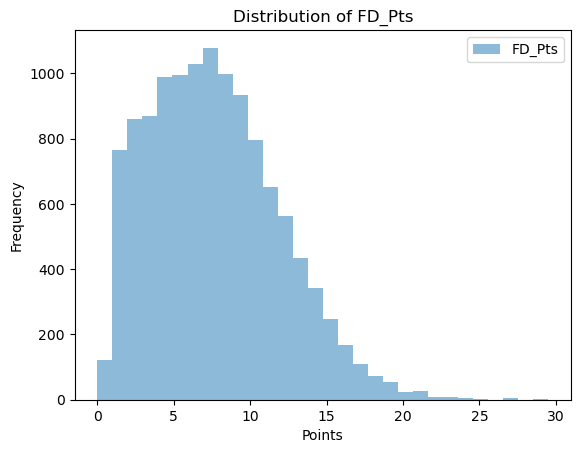

In [669]:
# Plot FD_Pts
plt.hist(kicker_points['FD_Pts'], bins=30, alpha=0.5, label='FD_Pts')

# Adding titles and labels
plt.title('Distribution of Kicker FD_Pts')
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.legend(loc='upper right')

# Show the plot
plt.show()

In [675]:
kicker_points.columns

Index(['season', 'week', 'game_id', 'kicker_player_name', 'home_team',
       'away_team', 'posteam', 'defteam', 'extra_point_result', 'FG_39',
       'FG_49', 'FG_50+', 'rushing_yards', 'receiving_yards', 'passing_yards',
       'kicker_rush_td', 'kicker_rec_td', 'kicker_reception', 'kicker_pass_td',
       'kicker_ints', 'FD_Pts'],
      dtype='object')

In [676]:
cols_to_keep = ['season', 'week', 'game_id', 'kicker_player_name', 'home_team', 'away_team', 'posteam', 'defteam', 'FD_Pts']

In [677]:
kicker_points = kicker_points[cols_to_keep]

In [678]:
kicker_points.head()

,season,week,game_id,kicker_player_name,home_team,away_team,posteam,defteam,FD_Pts
0,2001,1,2001_01_ATL_SF,J.Cortez,SF,ATL,SF,ATL,10.0
1,2001,1,2001_01_ATL_SF,J.Feely,SF,ATL,ATL,SF,7.0
2,2001,1,2001_01_CAR_MIN,G.Anderson,MIN,CAR,MIN,CAR,1.0
3,2001,1,2001_01_CAR_MIN,J.Kasay,MIN,CAR,CAR,MIN,6.0
4,2001,1,2001_01_CHI_BAL,M.Stover,BAL,CHI,BAL,CHI,5.0


In [674]:
import sqlite3

In [679]:
conn = sqlite3.connect('nfl_dfs.db')

# Define the table name
table_name = 'kicker_target'

# Specify data types
dtype = {
    'season': 'INTEGER',
    'week': 'INTEGER',
    'game_id': 'TEXT',
    'kicker_player_name': 'TEXT',
    'home_team': 'TEXT',
    'away_team': 'TEXT',
    'posteam': 'TEXT',
    'defteam': 'TEXT',
    'FD_Pts': 'REAL'
}

# Write the dataframe to the SQLite table
kicker_points.to_sql(table_name, conn, if_exists='replace', index=False, dtype=dtype)

# Confirm that the data has been written
print(f"Data written to table {table_name} in SQLite database nfl_fantasy.db")

# Close the connection
conn.close()

Data written to table kicker_target in SQLite database nfl_fantasy.db


In [680]:
# Connect to SQLite database
conn = sqlite3.connect('nfl_dfs.db')

# Create a cursor object
cursor = conn.cursor()

# Execute a query to get the list of tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch all results
tables = cursor.fetchall()

# Print the list of tables
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in the database:
team_defense
defense_target
weekly_data
kicker_target
